In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version ('2.2.0+cu121')
torch.__version__

'2.2.0+cu121'

Machine learning is a game of 2 parts:
1. Get data into  a numerical representation.
2. Build a model to learn patterns in that numerical representation

In [2]:
# Linear regression line equation: { Y = a + bX }
# create *known* parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # adds extra dimension
y = weight * X + bias

In [3]:
X[:10], len(X)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 50)

In [4]:
y[:10], len(y)

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

## Splitting data into training and test sets.

In [5]:
# Create a train / test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
# Visualization
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label='Training Data')

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # show the legend
    plt.legend(prop={"size": 14});
    

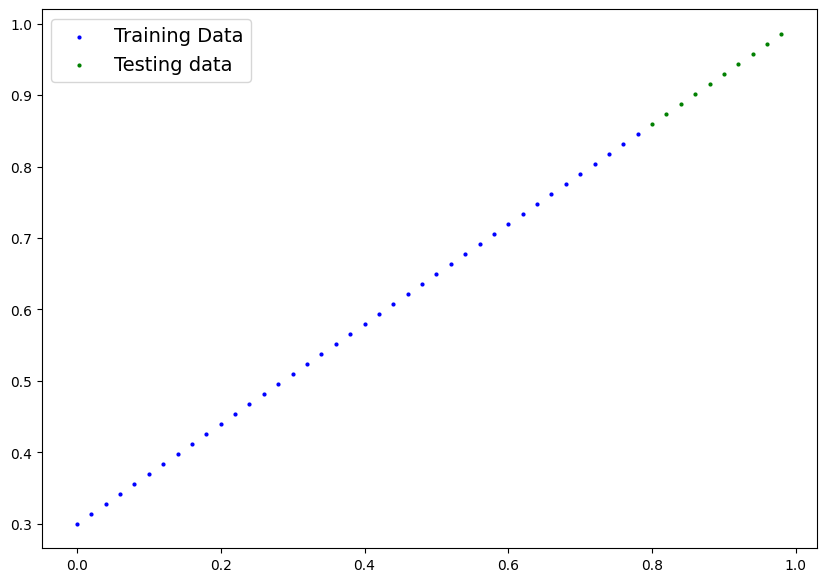

In [7]:
plot_predictions()

# Build Model

In [8]:
# create linear regression model class
## nn.Module-->base class for all neural network modules
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()

        # Initialize model parameters
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula

In [9]:
# create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

In [10]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# List named params
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [12]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # learning rate = possibly the most important hyperparameter we can set.
                                                    

In [14]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [15]:
torch.manual_seed(42)

# Train
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []

### Training
for epoch in range(epochs):
    # Set the model training mode
    model_0.train()

    # 1. Forward pass/Propagation
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropogation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()


    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scences.
    # with torch.no_grad(): # we may also see torch.no_grad() in older PyTOrch code
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    
    # Print out what is happenin'
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

        # Print out model state_dict()
        print(model_0.state_dict())

        print("=" * 100)

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Loss: 0.03

In [16]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

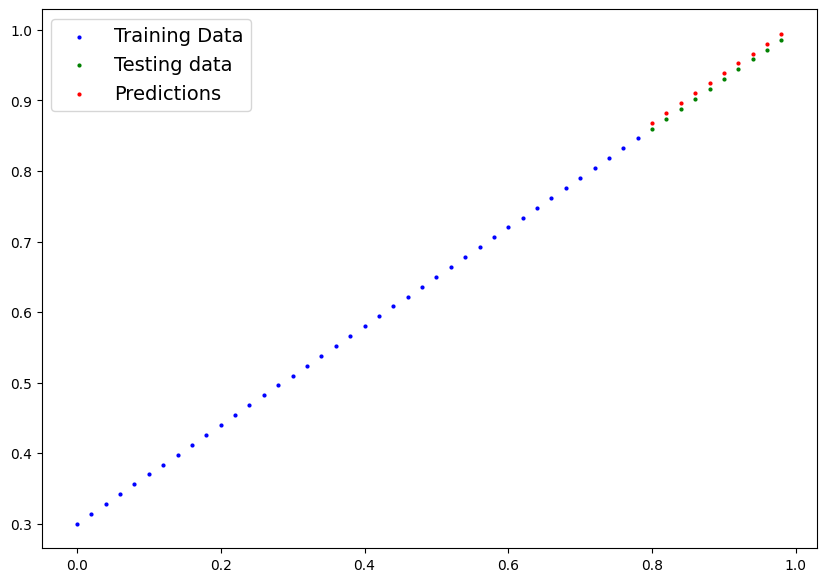

In [17]:
plot_predictions(predictions=y_preds_new)

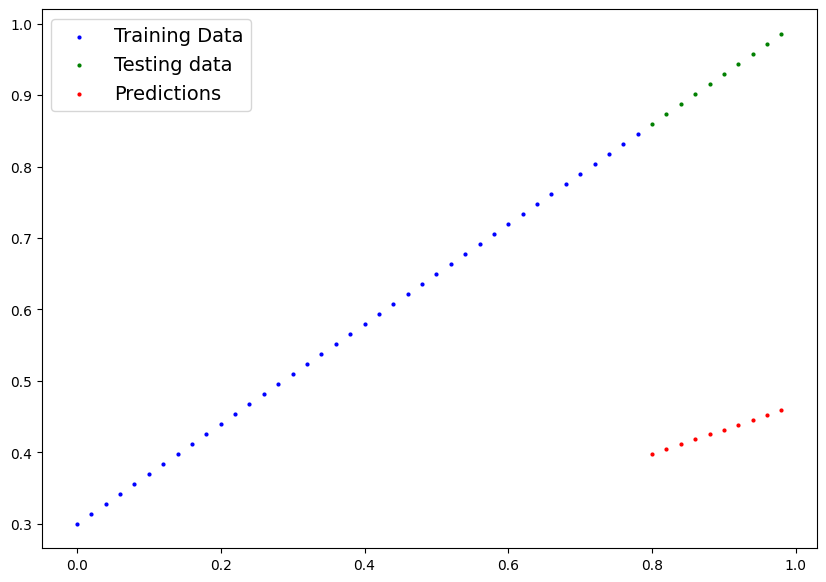

In [18]:
plot_predictions(predictions=y_preds)

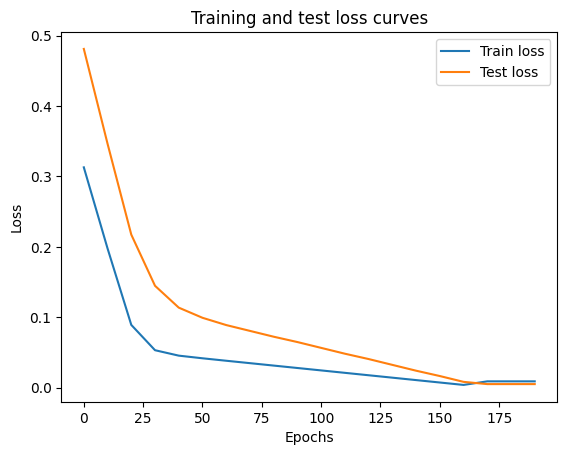

In [19]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# Saving a model in PyTorch
There are three main methods of saving and loading models in PyTorch

1. `torch.save()` - allows us save a PyTorch object in Python's pickle format
2. `torch.load()` - allows us load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary


In [27]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saved model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saved model to: models\01_pytorch_workflow_model_0.pth


# Loading a PyTorch model
Since we saved our model's state_dict() rather than the entire model, We'll craete a new instance of our model class and load the saved satate_dict() into that.

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [35]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [36]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [37]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [41]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [42]:
# make some models preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [43]:
# Compare loaded model preds with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6. Putting it all together
Let's go back through the steps above and see it all in one place

In [1]:
# import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# check torch version
print(f"Torch version: {torch.__version__}")

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Torch version: 2.2.0+cu121
Using device: cuda


### 6.1 Data

In [2]:
# Linear regression line equation: { Y = a + bX }
# create *known* parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # adds extra dimension
y = weight * X + bias

# Split Data
## Create a train / test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

# Visualization

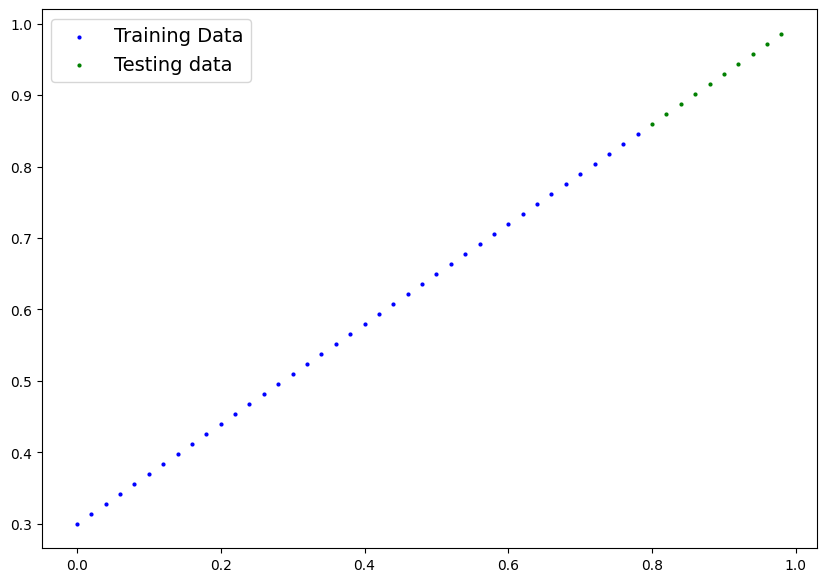

In [3]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label='Training Data')

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # show the legend
    plt.legend(prop={"size": 14});
plot_predictions()

# 6.2 Building the Regression model

In [4]:
class LinearRegressionModel_V2(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating the model parameters / aslo called: linear transform, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.linear_layer(x) # this pefroms linear regression formula in the background

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModel_V2()
model_1, model_1.state_dict()

(LinearRegressionModel_V2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [5]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions with model before training
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

# 6.2.1 Picka a loss function & optmizer

In [6]:
# Setup a loss function
loss_fn = nn.L1Loss() # same as MAE (Mean Absolute Error)

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

# 6.2.2 Build a training loop

In [9]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# Training the model
for epoch in range(epochs):
    # set the model training mode
    model_1.train()

    # 1. Forward pass / propagation
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()


    # Testing
    model_1.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scences.

        # 1. do the forward pass
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what is happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

        # Print out model state_dict()
        print(model_1.state_dict())

Epoch: 0 | Loss: 0.5436569452285767 | Test loss: 0.5605052709579468
OrderedDict({'linear_layer.weight': tensor([[0.7567]]), 'linear_layer.bias': tensor([0.8100])})
Epoch: 10 | Loss: 0.42844706773757935 | Test loss: 0.42579537630081177
OrderedDict({'linear_layer.weight': tensor([[0.7177]]), 'linear_layer.bias': tensor([0.7100])})
Epoch: 20 | Loss: 0.31323719024658203 | Test loss: 0.2910855710506439
OrderedDict({'linear_layer.weight': tensor([[0.6787]]), 'linear_layer.bias': tensor([0.6100])})
Epoch: 30 | Loss: 0.1980273276567459 | Test loss: 0.1563757359981537
OrderedDict({'linear_layer.weight': tensor([[0.6397]]), 'linear_layer.bias': tensor([0.5100])})
Epoch: 40 | Loss: 0.0828174576163292 | Test loss: 0.021665919572114944
OrderedDict({'linear_layer.weight': tensor([[0.6007]]), 'linear_layer.bias': tensor([0.4100])})
Epoch: 50 | Loss: 0.023356426507234573 | Test loss: 0.048834484070539474
OrderedDict({'linear_layer.weight': tensor([[0.5884]]), 'linear_layer.bias': tensor([0.3505])})
Ep

In [10]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [11]:
weight, bias

(0.7, 0.3)

# Evaluation

In [12]:
# Turn model into evaluation mode
model_1.eval()

with torch.inference_mode():
    y_preds_new = model_1(X_test)
y_preds_new

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]])

### Before Training

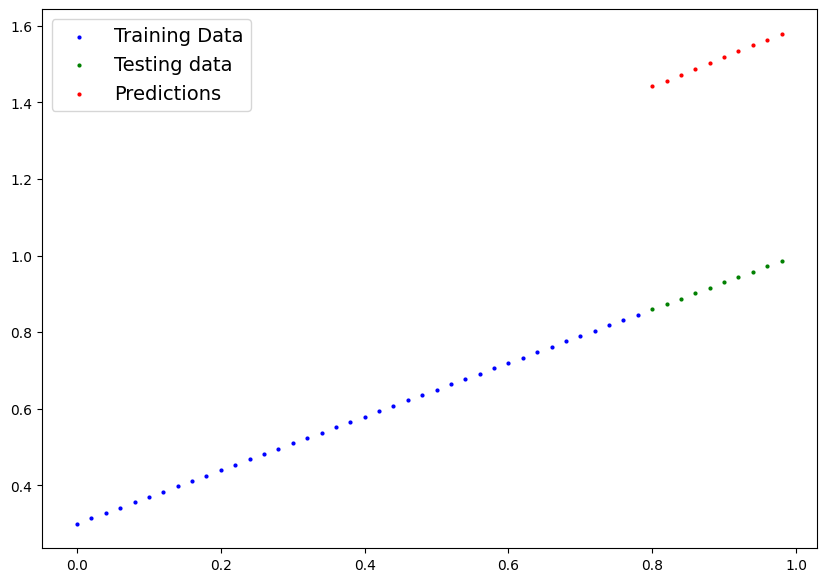

In [13]:
plot_predictions(predictions=y_preds)

### After Training


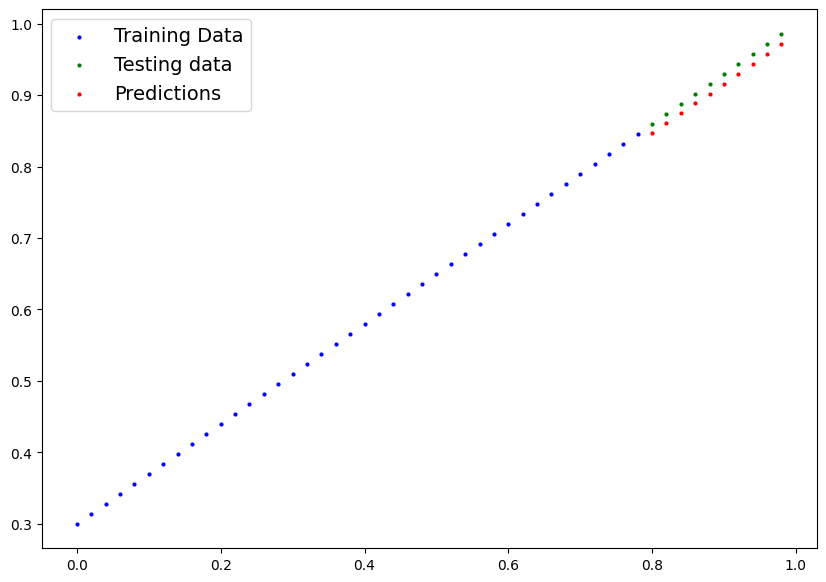

In [14]:
plot_predictions(predictions=y_preds_new)

# Plot the loss curves

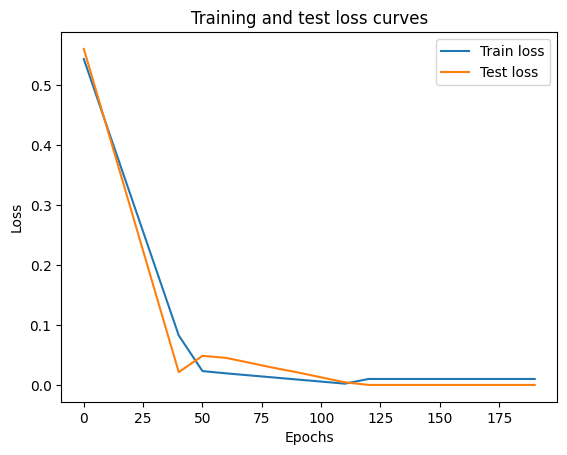

In [15]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

# Saving the model

In [25]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saved model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), f=MODEL_SAVE_PATH)


Saved model to: models\01_pytorch_workflow_model_1.pth


NameError: name 'model_1' is not defined

# Loading the model

In [20]:
# instantiating a new instance of our model class
loaded_model_1 = LinearRegressionModel_V2()

# Load the saved state_dict of the model_1 (this will update the new instance with updated parameters)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])

In [21]:
## Evaluating our loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_1(X_test)

loaded_model_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]])

In [22]:
model_1.eval()
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]])

In [23]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

<h1>Exercises</h1>

In [1]:
# import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

# check torch version
print(f"Torch version: {torch.__version__}")

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Torch version: 2.2.0+cu121
Using device: cuda


In [5]:
# Linear regression line equation: { Y = a + bX }
# create *known* parameters
weight = 0.3
bias = 0.9

# Create 
start = 0
end = 2
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # adds extra dimension
y = weight * X + bias

# Split Data
## Create a train / test split
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

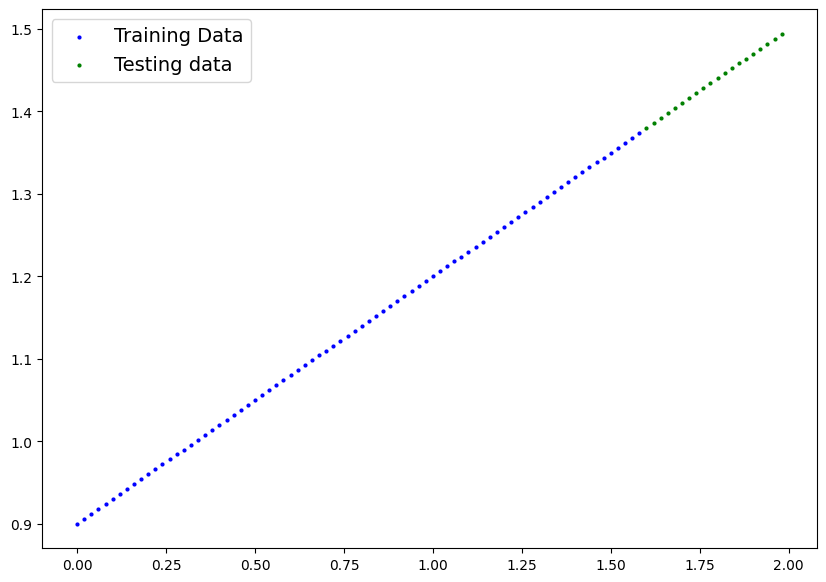

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label='Training Data')

    # plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # show the legend
    plt.legend(prop={"size": 14});
plot_predictions()

In [10]:
# Building Module

class LinearRegressionModel_V3(nn.Module):
    def __init__(self):
        super().__init__()

        # Use nn.Linear() for creating the model parameters / aslo called: linear transform, fully connected layer, dense layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: 
        return self.linear_layer(x) # this pefroms linear regression formula in the background

# Set the manual seed
torch.manual_seed(42)
model_2 = LinearRegressionModel_V3()
model_2, model_2.state_dict()

(LinearRegressionModel_V3(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [12]:
# Setup a loss function
loss_fn = nn.L1Loss() # same as MAE (Mean Absolute Error)

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [13]:
torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# Training the model
for epoch in range(epochs):
    # set the model training mode
    model_2.train()

    # 1. Forward pass / propagation
    y_pred = model_2(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step()


    # Testing
    model_2.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scences.

        # 1. do the forward pass
        test_pred = model_2(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what is happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

        # Print out model state_dict()
        print(model_2.state_dict())

Epoch: 0 | Loss: 0.3044882118701935 | Test loss: 0.739641547203064
OrderedDict({'linear_layer.weight': tensor([[0.7568]]), 'linear_layer.bias': tensor([0.8220])})
Epoch: 10 | Loss: 0.20148487389087677 | Test loss: 0.5399021506309509
OrderedDict({'linear_layer.weight': tensor([[0.6822]]), 'linear_layer.bias': tensor([0.7558])})
Epoch: 20 | Loss: 0.14004984498023987 | Test loss: 0.38408851623535156
OrderedDict({'linear_layer.weight': tensor([[0.6174]]), 'linear_layer.bias': tensor([0.7160])})
Epoch: 30 | Loss: 0.10848859697580338 | Test loss: 0.2749379873275757
OrderedDict({'linear_layer.weight': tensor([[0.5656]]), 'linear_layer.bias': tensor([0.6995])})
Epoch: 40 | Loss: 0.09311974793672562 | Test loss: 0.2101781815290451
OrderedDict({'linear_layer.weight': tensor([[0.5279]]), 'linear_layer.bias': tensor([0.7023])})
Epoch: 50 | Loss: 0.08289730548858643 | Test loss: 0.17251098155975342
OrderedDict({'linear_layer.weight': tensor([[0.4993]]), 'linear_layer.bias': tensor([0.7158])})
Epoch

In [15]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3001]])),
             ('linear_layer.bias', tensor([0.8953]))])

In [16]:
weight, bias

(0.3, 0.9)

In [22]:
# Turn model into evaluation mode
model_2.eval()

with torch.inference_mode():
    y_preds_new = model_2(X_test)
y_preds_new

tensor([[1.3755],
        [1.3815],
        [1.3875],
        [1.3935],
        [1.3995],
        [1.4055],
        [1.4115],
        [1.4175],
        [1.4235],
        [1.4295],
        [1.4355],
        [1.4415],
        [1.4475],
        [1.4535],
        [1.4595],
        [1.4655],
        [1.4715],
        [1.4775],
        [1.4835],
        [1.4895]])

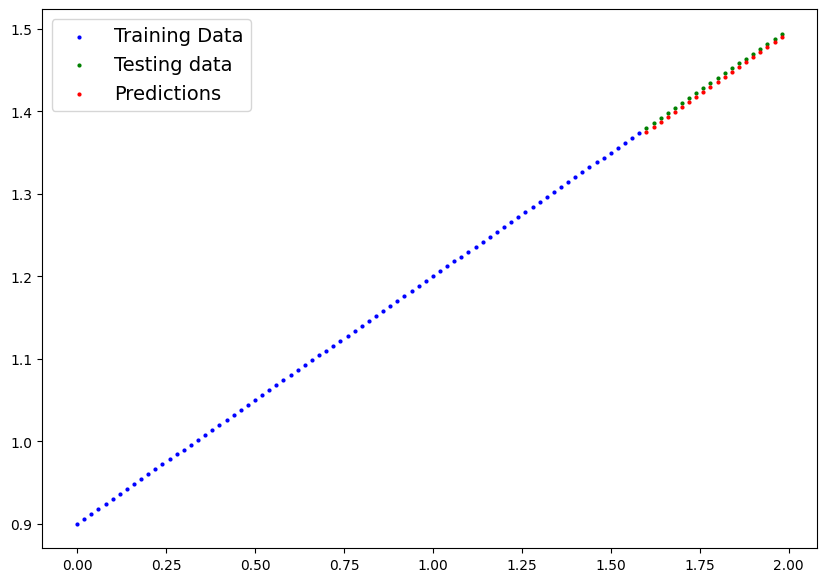

In [23]:
plot_predictions(predictions=y_preds_new)

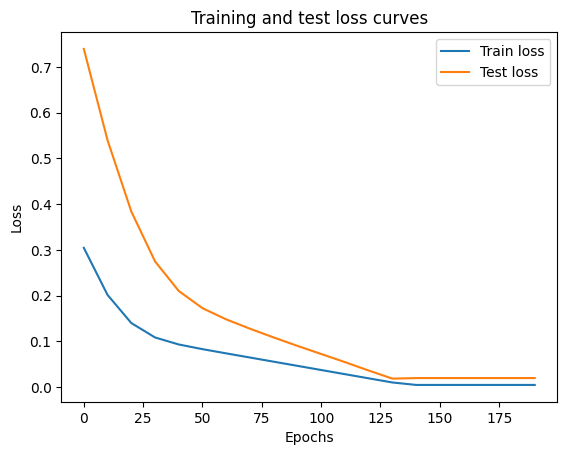

In [24]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [26]:
# Saving the model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Model Saved to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Model Saved to: models\01_pytorch_workflow_model_2.pth


In [29]:
# Loading the model back

loaded_model_2 = LinearRegressionModel_V3()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3001]])),
             ('linear_layer.bias', tensor([0.8953]))])

In [32]:
loaded_model_2.eval()

with torch.inference_mode():
    loaded_model_2_preds = loaded_model_2(X_test)
loaded_model_2_preds

tensor([[1.3755],
        [1.3815],
        [1.3875],
        [1.3935],
        [1.3995],
        [1.4055],
        [1.4115],
        [1.4175],
        [1.4235],
        [1.4295],
        [1.4355],
        [1.4415],
        [1.4475],
        [1.4535],
        [1.4595],
        [1.4655],
        [1.4715],
        [1.4775],
        [1.4835],
        [1.4895]])

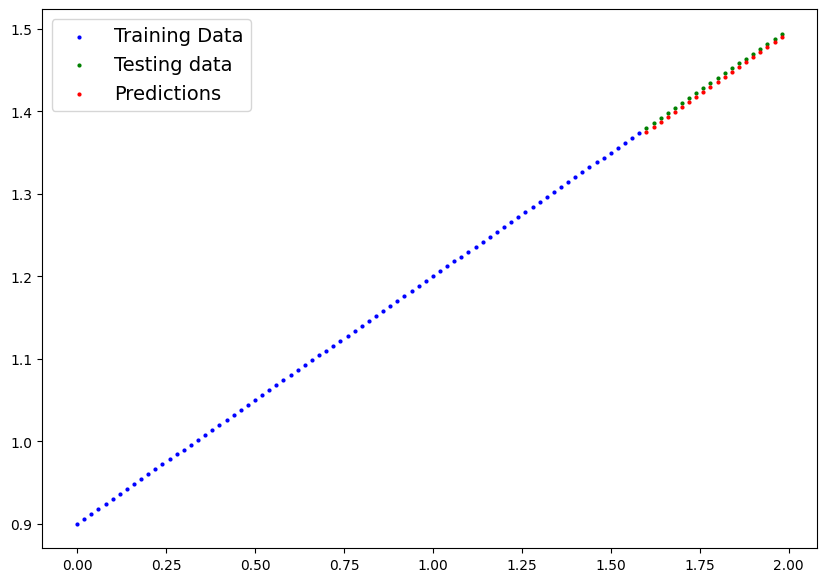

In [33]:
plot_predictions(predictions=loaded_model_2_preds)